In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [25]:
df_train = pd.read_csv('input/train_data/train_data.csv', sep=',')
df_test = pd.read_csv('input/test_data/test_data.csv', sep=',')
nan_column = df_train.columns[df_train.isna().any()].tolist()
const_columns = [c for c in df_train.columns if len(df_train[c].drop_duplicates()) <= 2]

to_remove = nan_column + list(set(const_columns) - set(nan_column))

df = df_train.drop(columns=to_remove)
df.head()

,engine_no,time_in_cycles,op_setting_1,op_setting_2,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_18,sensor_20,sensor_21,RUL
0,0,1,25.0074,0.6200,462.54,536.84,1256.52,1043.97,7.05,9.02,...,36.70,164.75,2028.38,7875.47,10.8850,306,1915,14.35,8.4712,339
1,0,2,35.0072,0.8413,449.44,555.44,1364.42,1128.75,5.48,8.00,...,41.78,183.67,2388.20,8073.12,9.2527,334,2223,14.88,8.9928,338
2,0,3,25.0053,0.6215,462.54,536.42,1265.94,1047.23,7.05,9.03,...,36.49,164.49,2028.40,7884.88,10.9054,307,1915,14.21,8.5107,337
3,0,4,42.0045,0.8407,445.00,549.41,1355.52,1115.81,3.91,5.72,...,41.78,130.67,2388.13,8093.08,9.3434,331,2212,10.63,6.4578,336
4,0,5,35.0046,0.8400,449.44,555.21,1361.04,1123.63,5.48,8.00,...,41.79,183.02,2388.19,8078.18,9.3287,334,2223,14.95,9.0279,335


In [ ]:
df['GonnaFail']=(df['RUL']<=100).astype(int)
df.head()

In [47]:
df_nc = (df - df.mean())/(df.std()- df.mean())

In [51]:
col = df_nc.columns

In [60]:
df.engine_no.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [67]:
will = df[df['GonnaFail']==1]
will_not = df[df['GonnaFail']==0]

op_setting_1


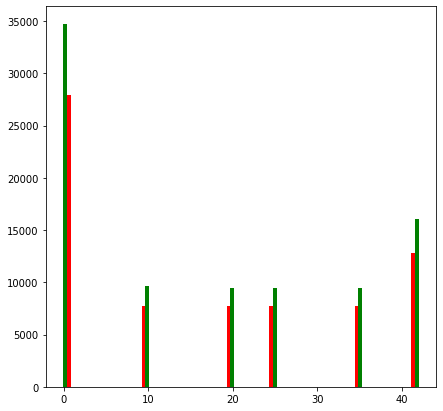

op_setting_2


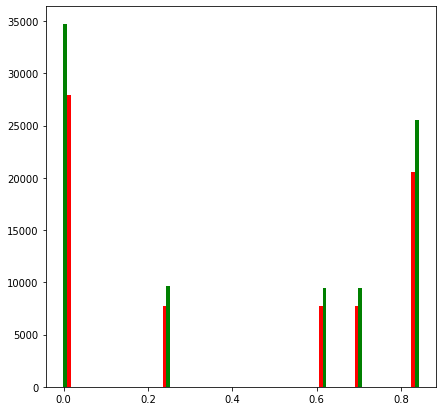

sensor_1


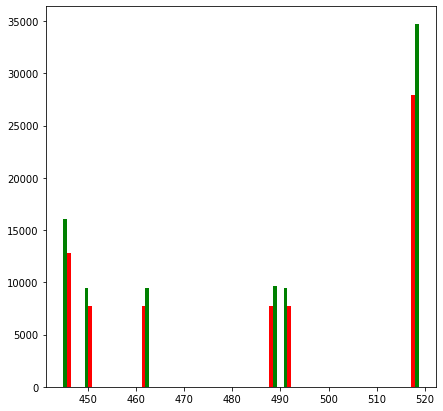

sensor_2


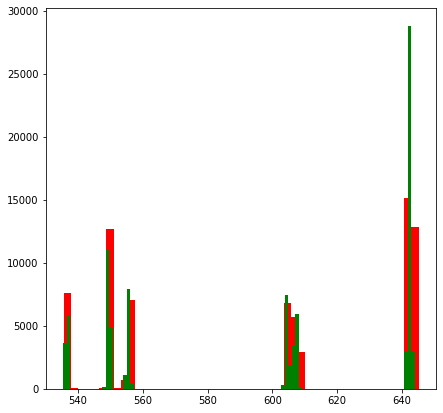

sensor_3


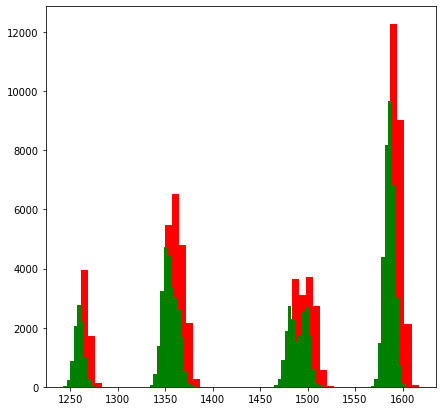

sensor_4


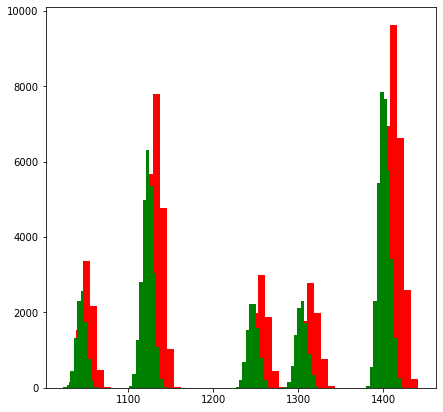

sensor_5


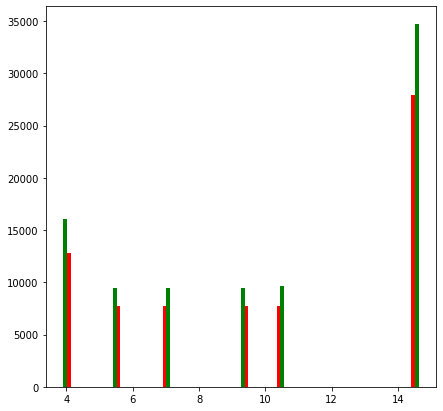

sensor_6


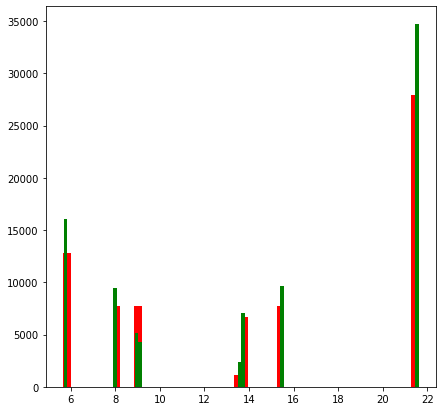

sensor_7


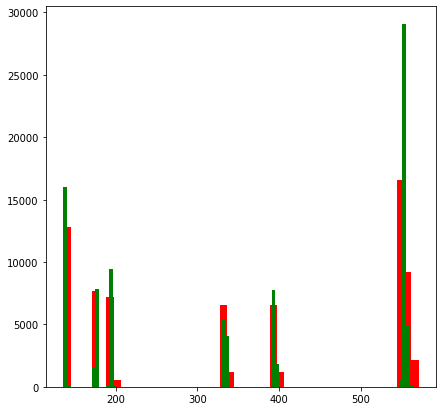

sensor_8


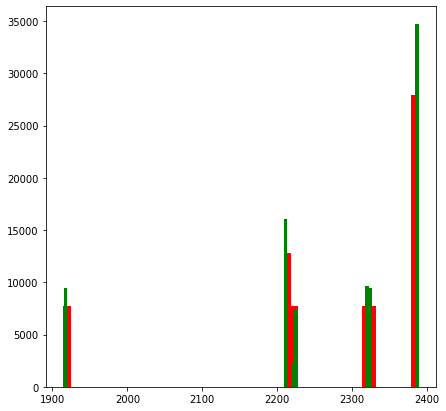

sensor_9


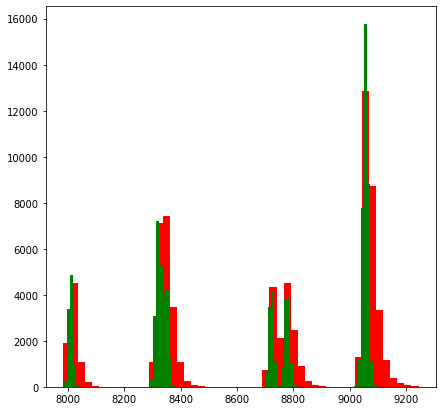

sensor_10


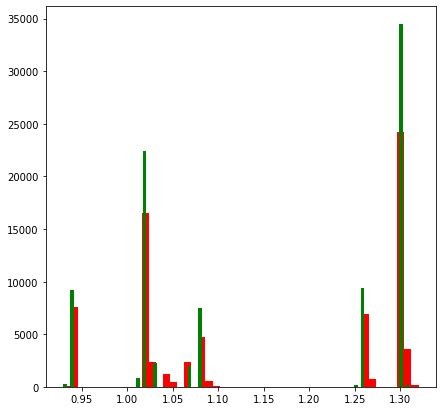

sensor_11


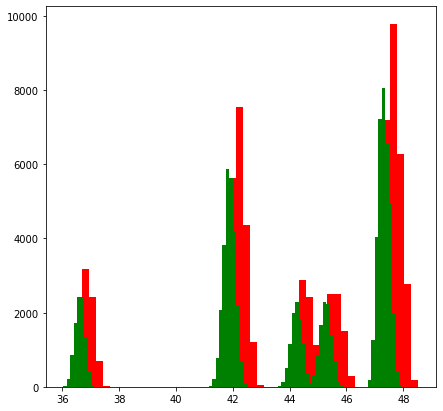

sensor_12


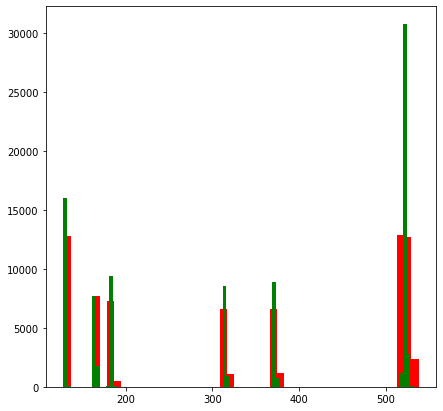

sensor_13


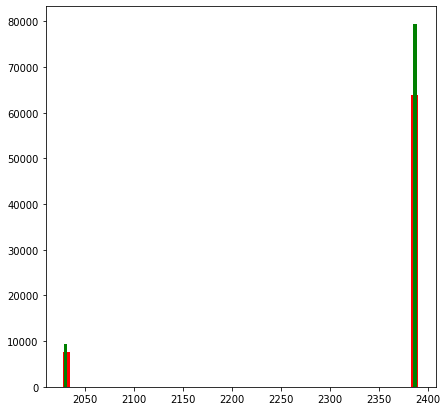

sensor_14


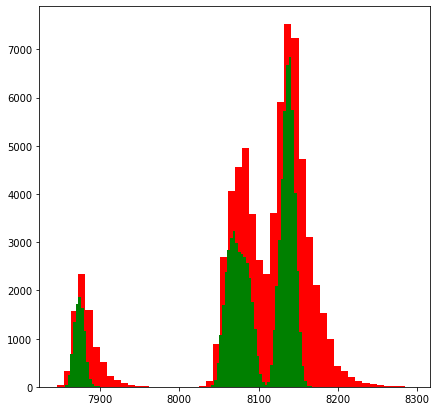

sensor_15


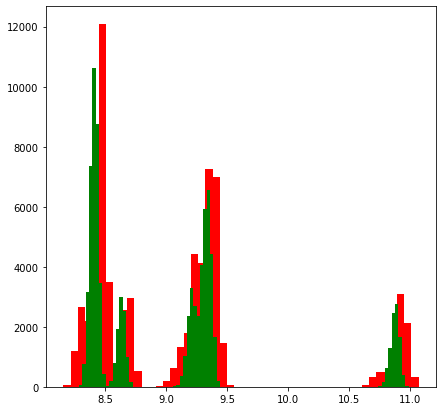

sensor_17


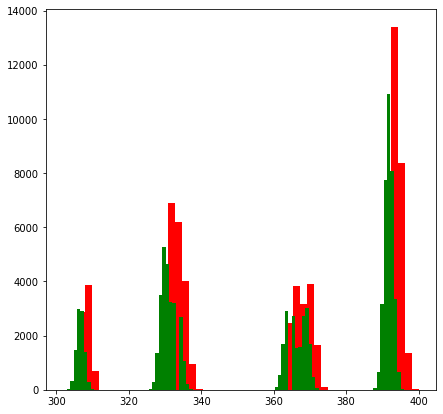

sensor_18


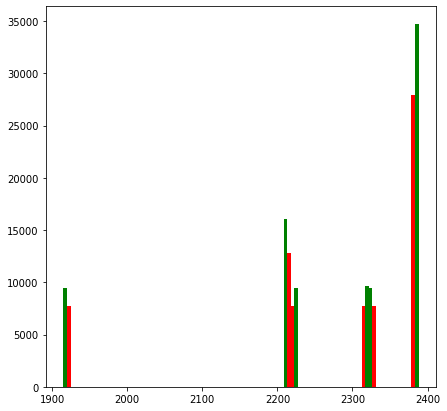

sensor_20


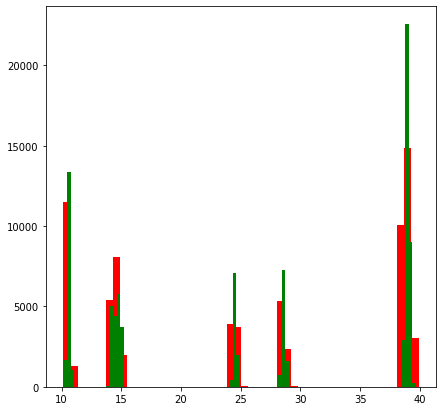

sensor_21


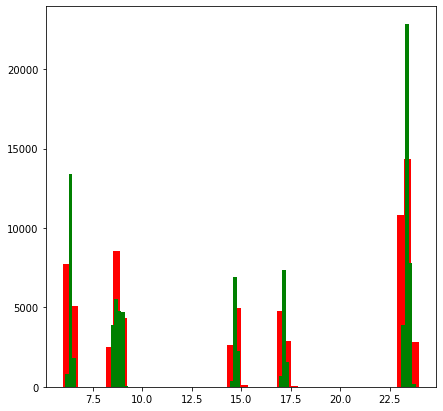

RUL


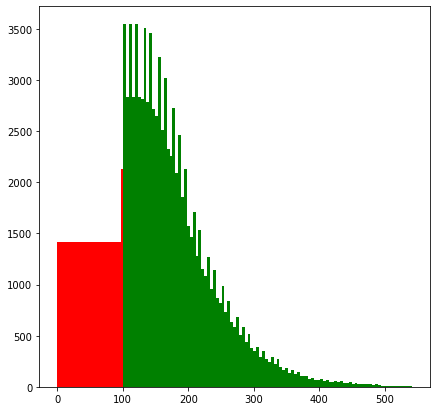

GonnaFail


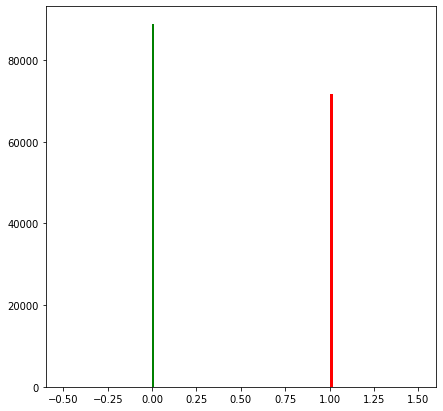

In [71]:
for c in col[2:]:
    print(c)
    plt.figure(figsize=(7, 7))
    plt.hist(will[c], color='r', bins=50)
    plt.hist(will_not[c], color='g', bins=100)
    plt.show()

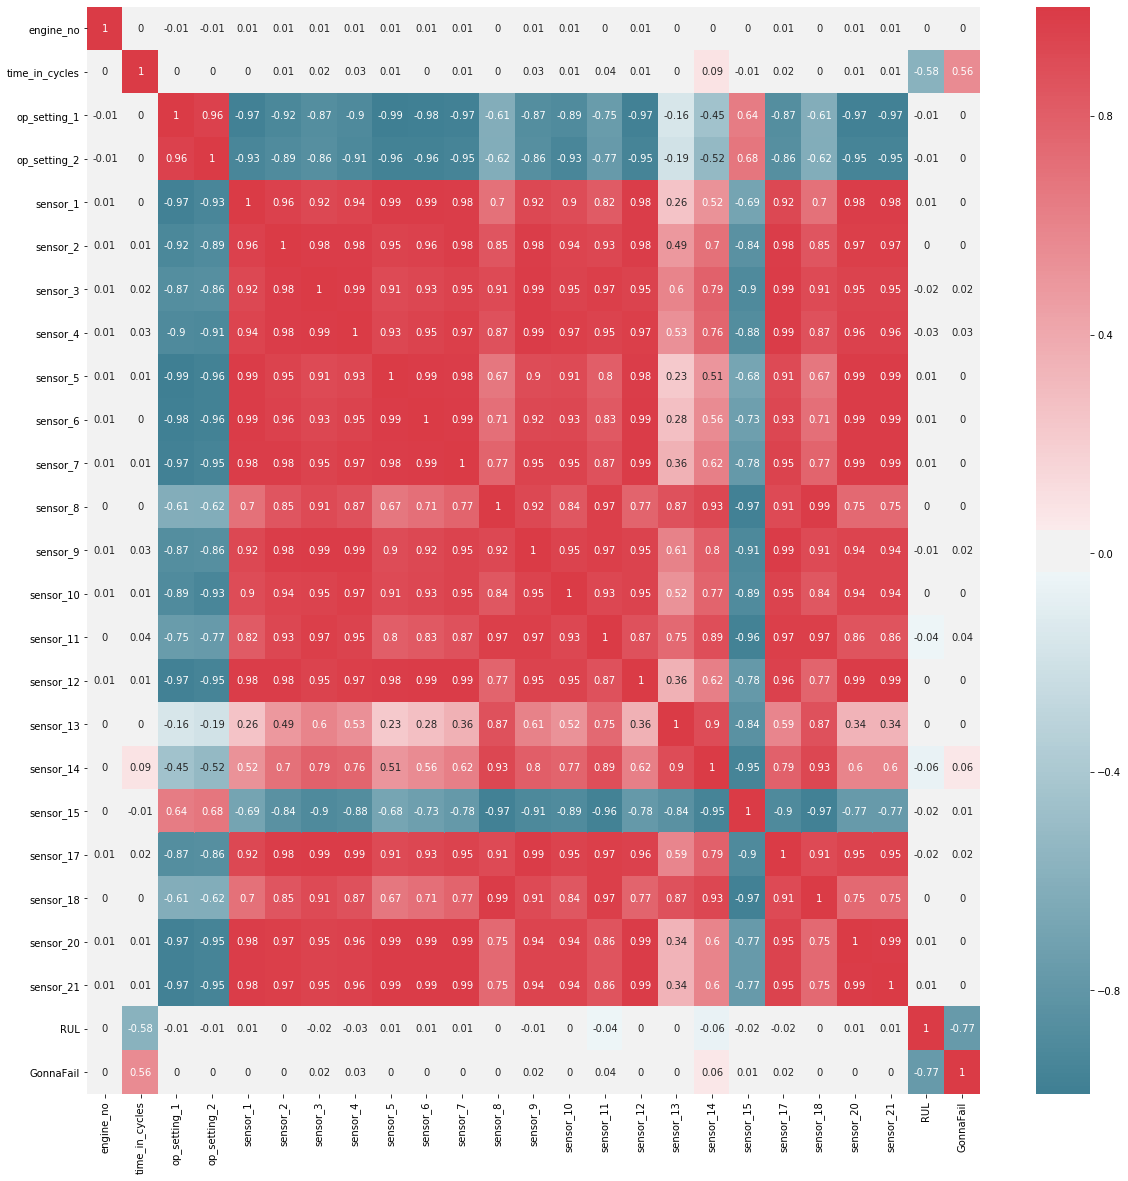

In [98]:
corr = df.corr()
corr = (corr*100).astype(int)/100
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True)

In [122]:
model = RandomForestClassifier()
X = df_nc.drop(columns=['RUL', 'GonnaFail'])
y = df['GonnaFail']

In [123]:
# Feature Engineering
s6 = df['sensor_6']
s7 = df['sensor_7']
s9 = df['sensor_9']
s11 = df['sensor_11']
s14 = df['sensor_14']

X['Feat1'] = np.cos(s6) + np.cos(s9) + np.sin(s14)
X['Feat2'] = s11 * np.sin(s7)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [124]:
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8701172362185083


In [104]:
from sklearn.decomposition import PCA

[9.83737835e-01 6.56953887e-03 6.49575462e-03 2.90570711e-03
 2.78566817e-04 1.15851109e-05 7.04805281e-07 7.43997937e-08
 7.33352510e-08 4.16824588e-08 4.06763550e-08 1.76461543e-08
 1.29731660e-08 1.27275257e-08 1.04002638e-08 8.81892950e-09
 7.51145252e-09 5.66403207e-09 7.95291630e-10 3.25427509e-10
 2.51407698e-10 3.97693597e-12 2.51348921e-13]


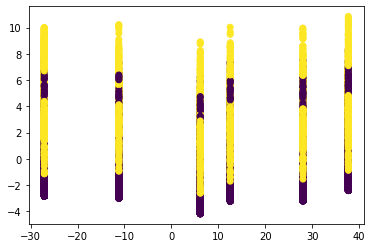

In [118]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()